In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib

## Results Global Network

### Variance over time for $x_M=0.5$.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


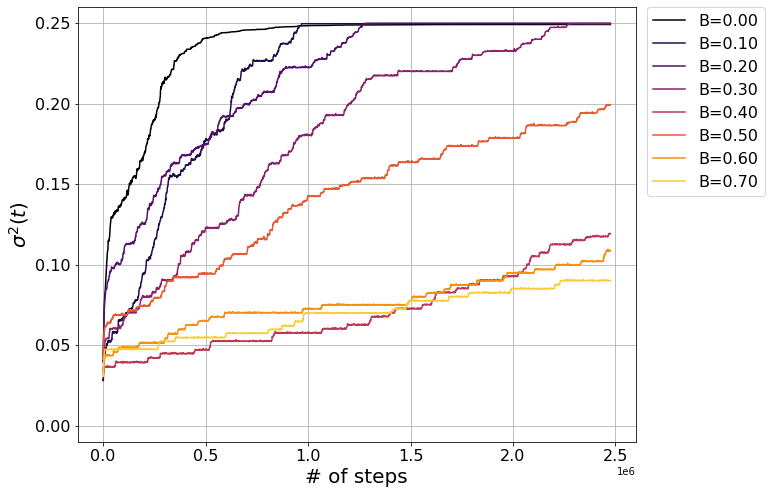

In [45]:
#Reproduce Figure 1
XM=0.5
file_path = "./global/history_statistics/statistical_parameters_B_{:.2f}-XM_{:.2f}.txt".format(round(0.00, 2), round(XM, 2))

plt.figure(figsize=(10,8))

data = np.loadtxt(file_path, skiprows=1)
steps = data[:,0]
BS = np.linspace(0.00,0.7,8)

cmap = matplotlib.colormaps['inferno']
for i, B in enumerate(BS):

    file_path = "./global/history_statistics/statistical_parameters_B_{:.2f}-XM_{:.2f}.txt".format(round(B, 2), round(XM, 2))
    data = np.loadtxt(file_path, skiprows=1)

    variances = data[:,2]
    color = cmap(i / len(BS))  # Interpolate color based on the position in the colormap
    plt.plot(steps,variances, label="B={:.2f}".format(B), color = color)

plt.ylim((-0.01,0.26))
plt.xlabel("# of steps", size= 20)
plt.ylabel(r"$\sigma^2(t)$", size= 20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.grid()
plt.legend(fontsize=16, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.savefig("global/images/variances_steps_B.eps", format="eps", transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.show()
plt.close()


### $\Delta_M$ over time for $x_M=0.5$.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


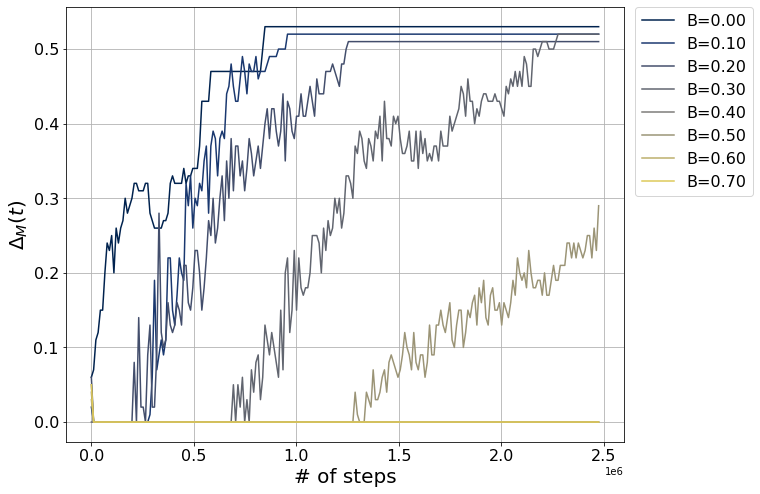

In [48]:
#Reproduce Figure 1
XM=0.5
plt.figure(figsize=(10,8))
file_path = "./global/history_statistics/statistical_parameters_B_{:.2f}-XM_{:.2f}.txt".format(round(0, 2), round(XM, 2))

data = np.loadtxt(file_path, skiprows=1)
steps = data[:,0]
steps_every_20th_value = steps[::11]

BS = np.linspace(0.00,0.7,8)
cmap = matplotlib.colormaps['cividis']

for i, B in enumerate(BS):

    file_path = "./global/history_statistics/statistical_parameters_B_{:.2f}-XM_{:.2f}.txt".format(round(B, 2), round(XM, 2))
    data = np.loadtxt(file_path, skiprows=1)
    Sig_x = data[:,3]
    every_20th_value = Sig_x[::11]/100
    color = cmap(i / len(BS))  # Interpolate color based on the position in the colormap
    plt.plot(steps_every_20th_value,every_20th_value, label="B={:.2f}".format(B), color = color)


plt.xlabel("# of steps", size= 20)
plt.ylabel("$\Delta_M(t)$", size= 20)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.grid()
plt.legend(fontsize=16, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.savefig("global/images/sig_m_steps_B.eps", format="eps", transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()

In [3]:
# Define the range of T and R values
delta = 0.02
B_i = 0.00
B_f = 1.02
XM_i = 0.00
XM_f = 1.02
B_range = np.arange(B_i, B_f , delta)
XM_range = np.arange(XM_i, XM_f, delta)

# Initialize an empty matrix to store the data
data_matrix_var = np.zeros((len(B_range), len(XM_range)))
data_matrix_S_max = np.zeros((len(B_range), len(XM_range)))
data_matrix_Delta_M = np.zeros((len(B_range), len(XM_range)))
# Loop through each file
for B_index, B in enumerate(B_range):
    for XM_index, XM in enumerate(XM_range):
        # Load the data from the file
        file_path = "./global/Asymptotic_statistics/statistical_parameters_B_{:.2f}-XM_{:.2f}.txt".format(round(B, 2), round(XM, 2))
        with open(file_path, "r") as f:
            lines = f.readlines()
        var_value = float(lines[-1].split()[2])
        S_max_value = float(lines[-1].split()[1])
        Delta_M_value = float(lines[-1].split()[3])
        # Store the last value in the data matrix
        data_matrix_var[B_index, XM_index] = var_value
        data_matrix_S_max[B_index, XM_index] = S_max_value/100
        data_matrix_Delta_M[B_index, XM_index] = Delta_M_value/100
    

### Variance $ \langle \sigma^2 \rangle$ as function of $B$ and $x_M$

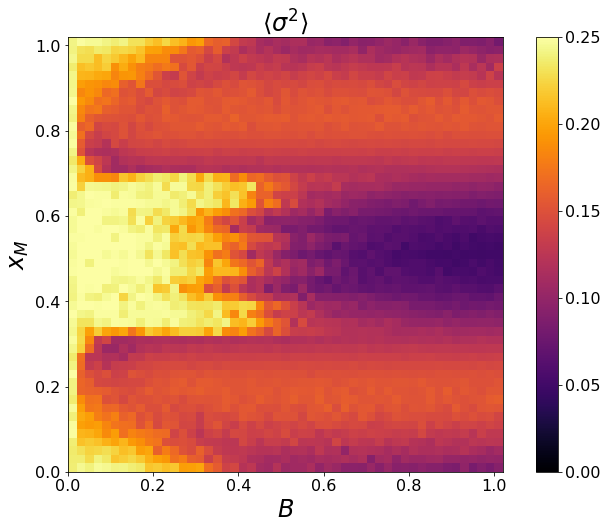

In [5]:
# Create the heatmap
fig = plt.figure(figsize=(12,8))
plt.ylim((0,1.02))
plt.xlim((0,1.02))
plt.xlabel("$B$", size = 24)
plt.ylabel("$x_{M}$", size = 24)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
vmin = 0.0
vmax = 0.25
im = plt.imshow(data_matrix_var.T, cmap="inferno", origin="lower", extent=[B_i, B_f, XM_i, XM_f], vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16)
plt.title(r"$ \langle \sigma ^2 \rangle $", fontsize=24)
plt.savefig("./global/images/Grid_B_XM_var.eps", format='eps', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()

### Normalized size of the largest cluster $\langle S_{max} \rangle$ as function of $B$ and $x_M$

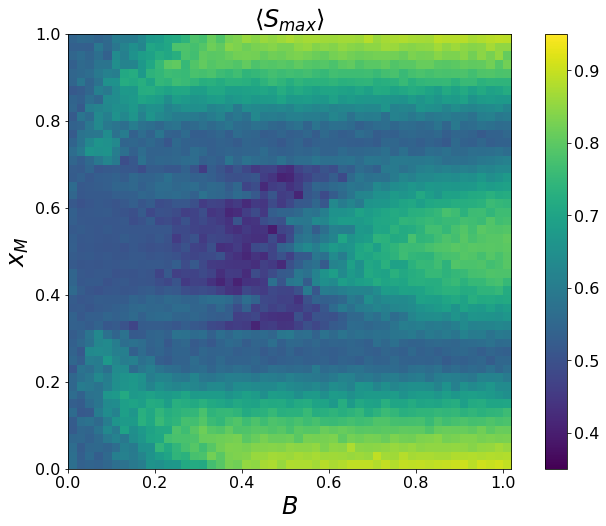

In [6]:
fig = plt.figure(figsize=(12,8))
plt.ylim((0,1))
plt.xlim((0,B_f))
plt.xlabel("$B$", size = 24)
plt.ylabel("$x_{M}$", size = 24)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
vmin = 0.35
vmax = 0.95
im = plt.imshow(data_matrix_S_max.T, cmap="viridis", origin="lower", extent=[B_i, B_f, XM_i, XM_f],vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16)
plt.title(r"$\langle S_{max} \rangle$", fontsize=24)
plt.savefig("./global/images/Grid_B_XM_SMax.eps", format='eps', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()

### Size difference between the largest cluster and the cluster with the same opinon that the media $\langle \Delta_{max} \rangle$ as function of $B$ and $x_M$

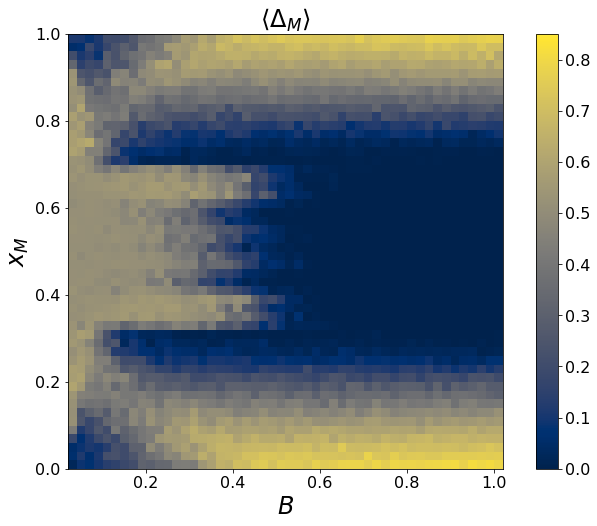

In [7]:
fig = plt.figure(figsize=(12,8))
plt.ylim((0.0,1))
plt.xlim((0.02,B_f))
plt.xlabel("$B$", size = 24)
plt.ylabel("$x_{M}$", size = 24)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
vmin = 0.00
vmax = 0.85
im = plt.imshow(data_matrix_Delta_M.T, cmap="cividis", origin="lower", extent=[B_i, B_f, XM_i, XM_f],vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16)
plt.title(r"$\langle \Delta_M \rangle$", fontsize=24)
plt.savefig("./global/images/Grid_B_XM_sigx.eps", format='eps', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()

## Results Ring Network

In [21]:
# Define the range of T and R values
delta = 0.02
B_i = 0.00
B_f = 1.02
XM_i = 0.50
XM_f = 1.02
B_range = np.arange(B_i, B_f , delta)
XM_range = np.arange(XM_i, XM_f, delta)

# Initialize an empty matrix to store the data
data_matrix_var = np.zeros((len(B_range),2*len(XM_range)-1))
data_matrix_S_max = np.zeros((len(B_range), 2*len(XM_range)-1))
data_matrix_Delta_M = np.zeros((len(B_range),2*len(XM_range)-1))

# Loop through each file
for B_index, B in enumerate(B_range):
    for XM_index, XM in enumerate(XM_range):
        # Load the data from the file
        file_path = "./ring/Asymptotic_statistics/statistical_parameters_B_{:.2f}-XM_{:.2f}.txt".format(round(B, 2), round(XM, 2))
        with open(file_path, "r") as f:
            lines = f.readlines()
        var_value = float(lines[-1].split()[2])
        S_max_value = float(lines[-1].split()[1])
        Delta_M_value = float(lines[-1].split()[3])
        # Store the last value in the data matrix
        data_matrix_var[B_index, XM_index + 25] = var_value
        data_matrix_S_max[B_index, XM_index + 25] = S_max_value/100
        data_matrix_Delta_M[B_index, XM_index + 25] = Delta_M_value/100

for B_index, B in enumerate(B_range):
    for XM_index, XM in enumerate(XM_range):
        # Load the data from the file
        file_path = "./ring/Asymptotic_statistics/statistical_parameters_B_{:.2f}-XM_{:.2f}.txt".format(round(B, 2), round(XM, 2))
        with open(file_path, "r") as f:
            lines = f.readlines()
        var_value = float(lines[-1].split()[2])
        S_max_value = float(lines[-1].split()[1])
        Delta_M_value = float(lines[-1].split()[3])
        # Store the last value in the data matrix
        data_matrix_var[B_index, -XM_index - 26] = var_value
        data_matrix_S_max[B_index, -XM_index - 26] = S_max_value/100
        data_matrix_Delta_M[B_index, -XM_index-26] = Delta_M_value/100
    

### Variance $ \langle \sigma^2 \rangle$ as function of $B$ and $x_M$

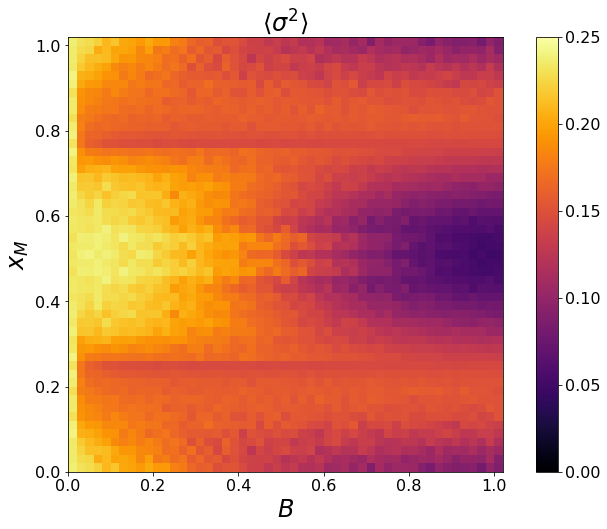

In [15]:
fig = plt.figure(figsize=(12,8))
plt.title(r"$ \langle \sigma ^2 \rangle $", fontsize=24)

plt.ylim((0,1.02))
plt.xlim((0,1.02))
plt.xlabel("$B$", size = 24)
plt.ylabel("$x_{M}$", size = 24)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
vmin = 0.0
vmax = 0.25
im = plt.imshow(data_matrix_var.T, cmap="inferno", origin="lower", extent=[B_i, B_f, 0, XM_f], vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16)

plt.savefig("./ring/images/Local_Grid_B_XM_var.eps", format='eps', transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.show()
plt.close()

### Normalized size of the largest cluster $\langle S_{max} \rangle$ as function of $B$ and $x_M$

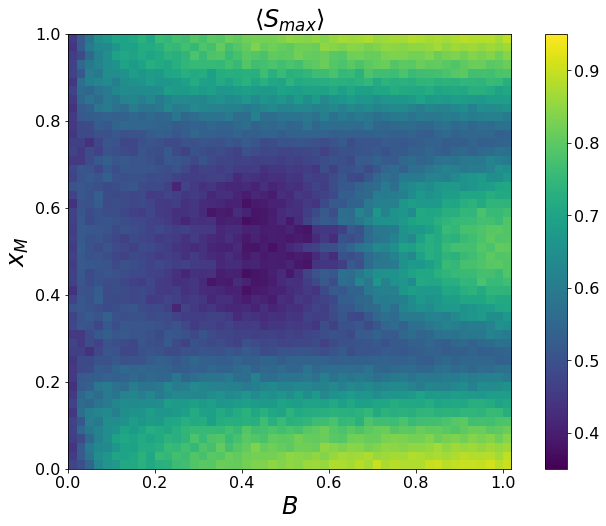

In [17]:
fig = plt.figure(figsize=(12,8))
plt.title(r"$\langle S_{max} \rangle$", fontsize=24)

plt.ylim((0,1))
plt.xlim((0,B_f))
plt.xlabel("$B$", size = 24)
plt.ylabel("$x_{M}$", size = 24)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
vmin = 0.35
vmax = 0.95
im = plt.imshow(data_matrix_S_max.T, cmap="viridis", origin="lower", extent=[B_i, B_f,0, XM_f],vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16)

plt.savefig("./ring/images/Local_Grid_B_XM_SMax.eps", format='eps', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()


### Size difference between the largest cluster and the cluster with the same opinon that the media $\langle \Delta_{max} \rangle$ as function of $B$ and $x_M$

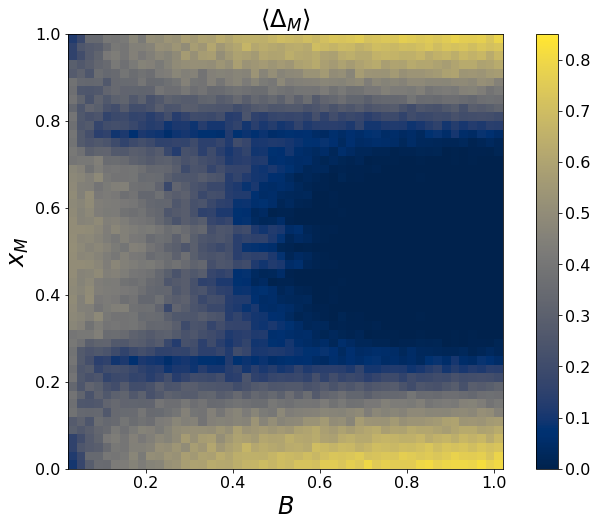

In [22]:
fig = plt.figure(figsize=(12,8))
plt.title(r"$\langle \Delta_{M} \rangle$", fontsize=24)
plt.ylim((0.0,1))
plt.xlim((0.02,B_f))

plt.xlabel("$B$", size = 24)
plt.ylabel("$x_{M}$", size = 24)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
vmin = 0.00
vmax = 0.85
im = plt.imshow(data_matrix_Delta_M.T, cmap="cividis", origin="lower", extent=[B_i, B_f, 0, XM_f],vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16)

plt.savefig("./ring/images/Local_Grid_B_XM_sigx.eps", format='eps', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()

## Results Small-World

In [31]:
# Define the range of T and R values
delta = 0.02
B_i = 0.00
B_f = 0.52
XM_i = 0.00
XM_f = 1.02
B_range = np.arange(B_i, B_f , delta)
XM_range = np.arange(XM_i, XM_f, delta)

# Initialize an empty matrix to store the data
data_matrix_var = np.zeros((2*len(B_range)-1,len(XM_range)))
data_matrix_S_max = np.zeros((2*len(B_range)-1,len(XM_range)))
data_matrix_Delta_M = np.zeros((2*len(B_range)-1,len(XM_range)))

# Loop through each file
for B_index, B in enumerate(B_range):
    for XM_index, XM in enumerate(XM_range):
        # Load the data from the file
        file_path = "./small-world/Asymptotic_statistics/statistical_parameters_B_{:.2f}-XM_{:.2f}.txt".format(round(B, 2), round(XM, 2))
        with open(file_path, "r") as f:
            lines = f.readlines()
        var_value = float(lines[-1].split()[2])
        S_max_value = float(lines[-1].split()[1])
        Delta_M_value = float(lines[-1].split()[3])
        # Store the last value in the data matrix
        data_matrix_var[B_index, XM_index] = var_value
        data_matrix_S_max[B_index, XM_index] = S_max_value/100
        data_matrix_Delta_M[B_index, XM_index] = Delta_M_value/100
        
B_i = 0.52
B_f = 1.02
XM_i = 0.00
XM_f = 0.52
B_range = np.arange(B_i, B_f , delta)
XM_range = np.arange(XM_i, XM_f, delta)

# Loop through each file
for B_index, B in enumerate(B_range):
    for XM_index, XM in enumerate(XM_range):
        # Load the data from the file
        file_path = "./small-world/Asymptotic_statistics/statistical_parameters_B_{:.2f}-XM_{:.2f}.txt".format(round(B, 2), round(XM, 2))
        with open(file_path, "r") as f:
            lines = f.readlines()
        var_value = float(lines[-1].split()[2])
        S_max_value = float(lines[-1].split()[1])
        Delta_M_value = float(lines[-1].split()[3])
        # Store the last value in the data matrix
        data_matrix_var[B_index + 26, XM_index] = var_value
        data_matrix_S_max[B_index + 26, XM_index] = S_max_value/100
        data_matrix_Delta_M[B_index +26 , XM_index] = Delta_M_value/100
        
# Loop through each file
for B_index, B in enumerate(B_range):
    for XM_index, XM in enumerate(XM_range):
        # Load the data from the file
        file_path = "./small-world/Asymptotic_statistics/statistical_parameters_B_{:.2f}-XM_{:.2f}.txt".format(round(B, 2), round(XM, 2))
        with open(file_path, "r") as f:
            lines = f.readlines()
        var_value = float(lines[-1].split()[2])
        S_max_value = float(lines[-1].split()[1])
        Delta_M_value = float(lines[-1].split()[3])
        # Store the last value in the data matrix
        data_matrix_var[B_index + 26, -XM_index] = var_value
        data_matrix_S_max[B_index + 26, -XM_index] = S_max_value/100
        data_matrix_Delta_M[B_index +26 , -XM_index] = Delta_M_value/100
        

### Variance $ \langle \sigma^2 \rangle$ as function of $B$ and $x_M$

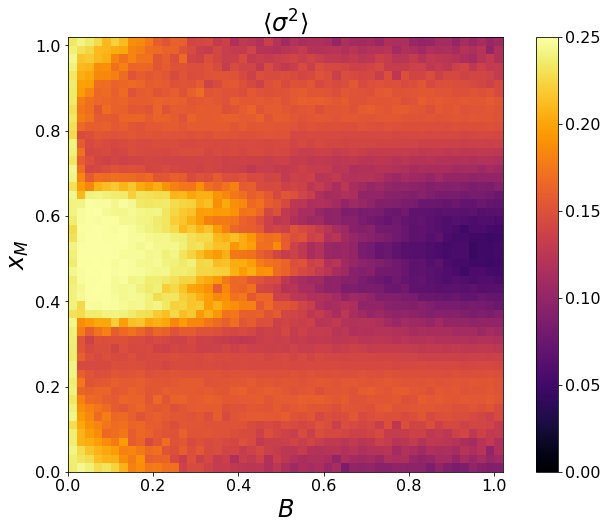

In [32]:

fig = plt.figure(figsize=(12,8))
plt.title(r"$ \langle \sigma ^2 \rangle $", fontsize=24)
plt.ylim((0,1.02))
plt.xlim((0,1.02))
plt.xlabel("$B$", size = 24)
plt.ylabel("$x_{M}$", size = 24)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
vmin = 0.0
vmax = 0.25
im = plt.imshow(data_matrix_var.T, cmap="inferno", origin="lower",extent=[0, 1.02, 0, 1.02], vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16)
plt.savefig("./small-world/images/SW_Grid_B_XM_var.eps", format='eps', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()

### Normalized size of the largest cluster $\langle S_{max} \rangle$ as function of $B$ and $x_M$

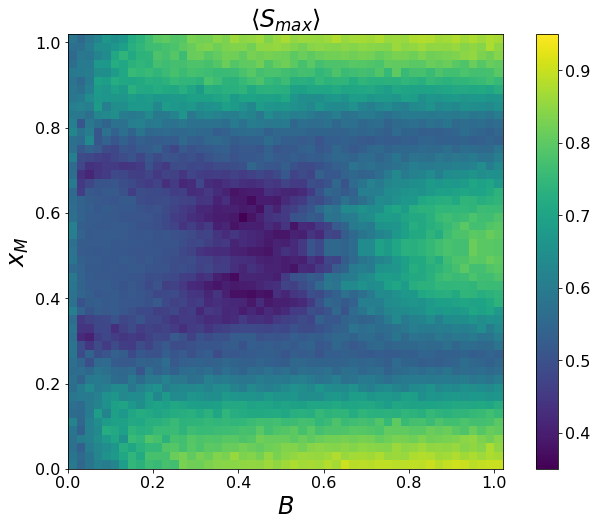

In [35]:
fig = plt.figure(figsize=(12,8))
plt.title(r"$\langle S_{max} \rangle$", fontsize=24)

plt.ylim((0,1.02))
plt.xlim((0,1.02))
plt.xlabel("$B$", size = 24)
plt.ylabel("$x_{M}$", size = 24)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
vmin = 0.35
vmax = 0.95
im = plt.imshow(data_matrix_S_max.T, cmap="viridis", origin="lower", extent=[0.00, 1.02,0, 1.02],vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16)

plt.savefig("./small-world/images/SW_Grid_B_XM_SMax.eps", format='eps', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()

### Size difference between the largest cluster and the cluster with the same opinon that the media $\langle \Delta_{max} \rangle$ as function of $B$ and $x_M$

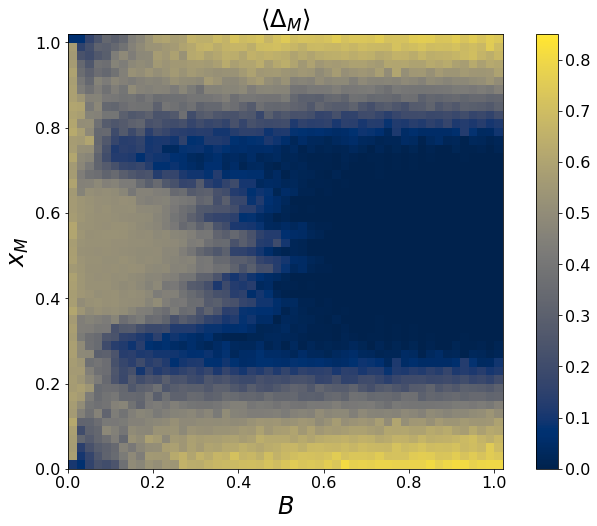

In [37]:
fig = plt.figure(figsize=(12,8))
plt.title(r"$\langle \Delta_{M} \rangle$", fontsize=24)

plt.ylim((0,1.02))
plt.xlim((0,1.02))
plt.xlabel("$B$", size = 24)
plt.ylabel("$x_{M}$", size = 24)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
vmin = 0.00
vmax = 0.85
im = plt.imshow(data_matrix_Delta_M.T, cmap="cividis", origin="lower", extent=[0.00, 1.02, 0, 1.02],vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16)
plt.savefig("./small-world/images/SW_Grid_B_XM_sigx.eps", format='eps', transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()